WELFake Dataset


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv("../../data/raw/WELFake_Dataset.csv")

df['label'] = df['label'].map({
    1:'REAL',
    0:'FAKE'
})

df.shape



(72134, 3)

In [6]:
df['label'].value_counts()

label
REAL    37106
FAKE    35028
Name: count, dtype: int64

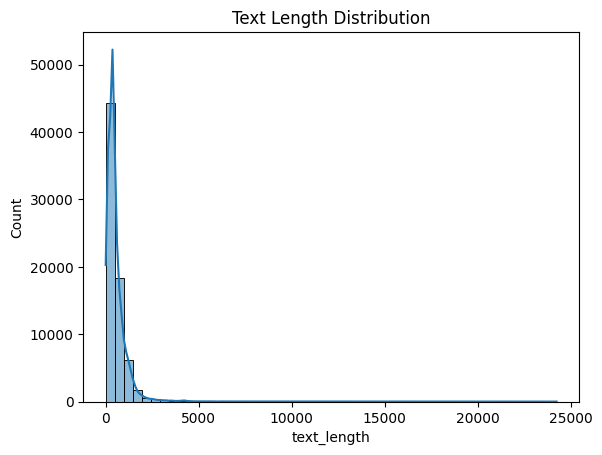

In [7]:
df['text_length']  = df['text'].apply(lambda x: len(str(x).split()))
sns.histplot(df['text_length'],bins=50, kde=True)
plt.title("Text Length Distribution")
plt.show()

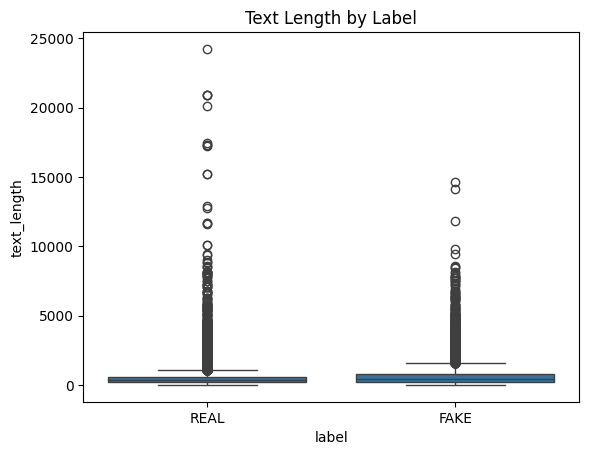

label
FAKE    577.615508
REAL    505.563063
Name: text_length, dtype: float64


In [8]:
df['text_length'] = df['text'].astype(str).apply(lambda x: len(x.split()))

sns.boxplot(x='label',y='text_length',data=df)
plt.title("Text Length by Label")
plt.show()

print(df.groupby('label')['text_length'].mean())

In [9]:
def trim_text(text, max_words=1000):
    words = text.split()
    return " ".join(words[:max_words])

df['text'] = df['text'].astype(str).apply(lambda x: trim_text(x))


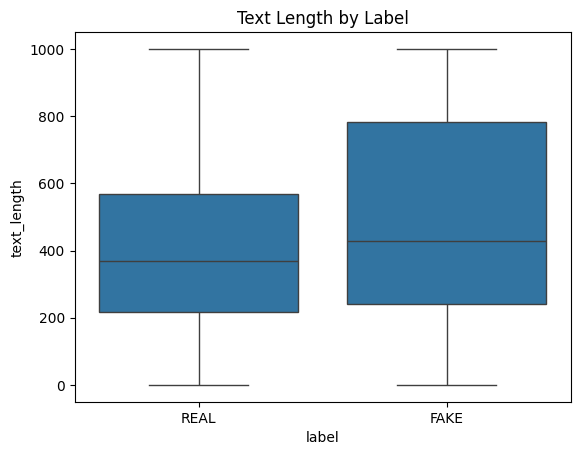

label
FAKE    500.787170
REAL    421.421387
Name: text_length, dtype: float64


In [10]:
df['text_length'] = df['text'].astype(str).apply(lambda x: len(x.split()))

sns.boxplot(x='label',y='text_length',data=df)
plt.title("Text Length by Label")
plt.show()

print(df.groupby('label')['text_length'].mean())

In [11]:
df.to_pickle("../../data/trimmed_processed/WELFake.pkl")